# Testing some programming skills and learning curve in Python

## Warming up

This test has the purpose to test your ability and interest in coding, but also in image processing. We will guide you through it. We will first start by a short guided tour of the interface (how to run or edit a code cell, how to add a cell). If you fail one question we will give you the answer so that you can go on.

*Test 1*: 
Purpose: check your variable and loop knowledge:<br>
Look at the following code and describe what is is doing, then transform it <br>
<b>Q1) to display number from 1 to 5; <br>
<b> Q2) to display only even numbers.<br>
   

In [12]:
for i in range(0,10):
    print(i)

0
1
2
3
4
5
6
7
8
9


*Test 2:*  Purpose: assessing your knowledge or at least understanding or object based programming. Now look at this dummy class called myownimagedata.  **Q3 What are the attributes? Methods? What are they doing?** <br>
Some Hint: **dir()** gives you the list of available method of a function; **help ()** display the documentation for a class or a method of a class.

In [13]:
class myownimagedata:
    
    # instance attributes
    def __init__(self, name, dimx, dimy, dimz):
        self.name = name
        self.dimx = dimx
        self.dimy = dimy
        self.dimz = dimz
        self.xsize=1;
        self.ysize=1;
        self.zsize=1;

    
    
    def setPixelsize(self, xsize,ysize,zsize):
        self.xsize=xsize;
        self.ysize=ysize;
        self.zsize=zsize;
        
    # instance method

    def testisotropic(self):
        if not(self.xsize == self.zsize):
            return "{} not isotropic".format(self.name)
        else:
            return "{} may be isotropic".format(self.name)



In [14]:
help(myownimagedata) # note that a lot of methods are defined by default for a python class.

Help on class myownimagedata in module __main__:

class myownimagedata(builtins.object)
 |  myownimagedata(name, dimx, dimy, dimz)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, name, dimx, dimy, dimz)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  setPixelsize(self, xsize, ysize, zsize)
 |  
 |  testisotropic(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



**Q4** :From the example code below using this class, **create a new code that will create an object of type myownimagedata, that you will call image2, 250x245x50 in pixel dimensions, and that will have a pixel size of 0.1x0.1x10**. Then **Q5 check is it is isotropic**.

In [15]:
# instantiate the object
image1 = myownimagedata("test", 100,100,10)

# call our instance methods
print(image1.testisotropic())


test may be isotropic


In [16]:
#Enter your own code below:

## Example of image processing

Some Hint: dir() gives you the list of available method of a function; help () display the documentation for a class or a method of a class.

In [17]:
# example of the list of available dataset in the data object:
#dir(data)

In [18]:
#example on documentation got on plt.hist()
#help(plt.hist)

Now look at the code below. Before we start, we import some preliminary libraries, and load a predefined dataset. We also define a function that will simplify display of data. **Q6: What is the name of the function? what are its parameters? What is is doing? (you can modify it if you want to test what a line is doing)**

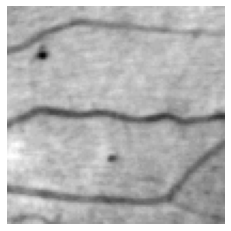

(array([5.000e+00, 2.000e+00, 5.700e+01, 2.660e+02, 5.170e+02, 1.081e+03,
        2.655e+03, 5.321e+03, 4.400e+02, 6.000e+01]),
 array([ 38. ,  47.1,  56.2,  65.3,  74.4,  83.5,  92.6, 101.7, 110.8,
        119.9, 129. ]),
 <a list of 10 Patch objects>)

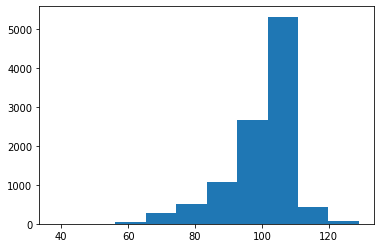

In [3]:
import skimage
import matplotlib.pyplot as plt
from skimage import data
testimage=data.microaneurysms()
def show_image(image,title='Image', cmap_type='gray'):
    plt.imshow(image,cmap=cmap_type)
    plt.axis('off')
    plt.show()
    
show_image(testimage)
plt.hist(testimage.ravel())

**Q7: what is the name of the type of graph displayed? WHat are the x axis and y axis?**

Now let's try to get the position of both black dots. **Q8: Can you describe what we have tried to do in the next two cells?**

In [4]:
from skimage import filters
thimage=skimage.filters.threshold_otsu(testimage)
print(thimage)


93


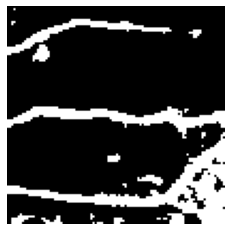

In [5]:
binary = testimage <93
show_image(binary)

We have tried one thresholding method, now we will try several at once. **Q9:What would be the best to identify the 2 dark spots? would it be sufficient?**

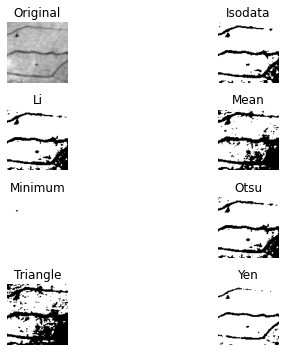

In [6]:
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(testimage, verbose=False)
plt.show()

Now in the following code **Q10: what does the error you get mean? <br> Q11:replace XXX by the name of the best threshold method displayed above.**

In [7]:
thimage=skimage.filters.threshold_XX(testimage)
print(thimage)


AttributeError: module 'skimage.filters' has no attribute 'threshold_XX'

**Q12:Now write the code to threshold the image, and display it**. Hint: we did that before.

In [23]:
#Type your code here

**Q13: what could you do to identify only the two dark spots?**

We will now try another approach, with no binary thresholding. <br> **Q14: Read the code, and try to describe what it is doing** <br> Hint: help(nameoftheclass) will give you documentation about nameoftheclass.

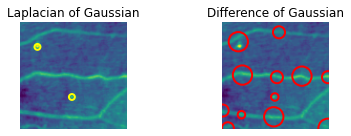

In [8]:
from skimage.feature import blob_dog, blob_log
from math import sqrt

image_gray=skimage.util.invert(testimage)
blobs_log = blob_log(image_gray, max_sigma=10, num_sigma=10,threshold=.075)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, min_sigma=1, max_sigma=10, threshold=.05)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)



blobs_list = [blobs_log, blobs_dog]
colors = ['yellow', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 2, figsize=(6, 2), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image_gray)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

**Q15 Write the code to compute the distance between the two spots, knowing that 1 pixel= 0.1 micron;** <br> Get coordinates example below:

In [9]:
print(blobs_log)

[[71.         49.          2.82842712]
 [23.         16.          2.82842712]]


In [10]:
print('x point 0 is '+str(blobs_log[0,0])+ ' pixels')
print('y point 0 is '+str(blobs_log[0,1])+ ' pixels')

x point 0 is 71.0 pixels
y point 0 is 49.0 pixels


# Bonus question: Some transformations

Observe and run the code below.

In [15]:
from skimage import transform
import numpy as np
import time


In [16]:
tform = transform.EuclideanTransform(
    rotation=np.pi / 12.,
    translation = (0, 0)
    )
print(tform.params)

[[ 0.96592583 -0.25881905  0.        ]
 [ 0.25881905  0.96592583  0.        ]
 [ 0.          0.          1.        ]]


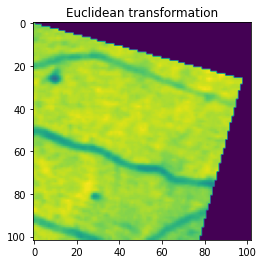

In [17]:
tf_img = transform.warp(testimage, tform.inverse)
fig, ax = plt.subplots()
ax.imshow(tf_img)
_ = ax.set_title('Euclidean transformation')

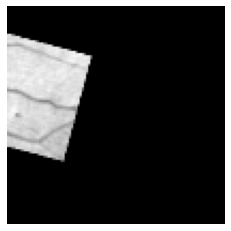

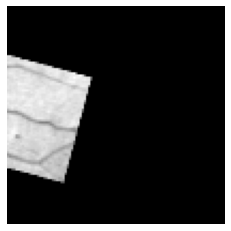

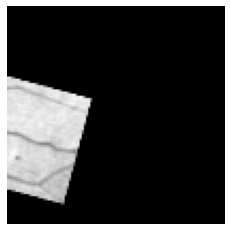

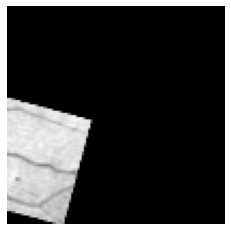

In [18]:
fig, ax = plt.subplots()
for i in range(1,5):
    tform = transform.SimilarityTransform(
        scale=0.5,
        rotation=np.pi/12,
        translation=(-10, 10*i))
    #print(tform.params)
    tf_img = transform.warp(testimage, tform.inverse)
  
   
    show_image(tf_img)
    
   

**Q16: Now Create some code such that the image will cross horizontally the display plot, while rotating and growing (getting bigger)**

In [25]:
# Write you code here: (you can copy and paste from code above)